SLIC with K means and FCM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic,mark_boundaries
from skimage.io import imshow,imread,imsave
from skimage import color
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


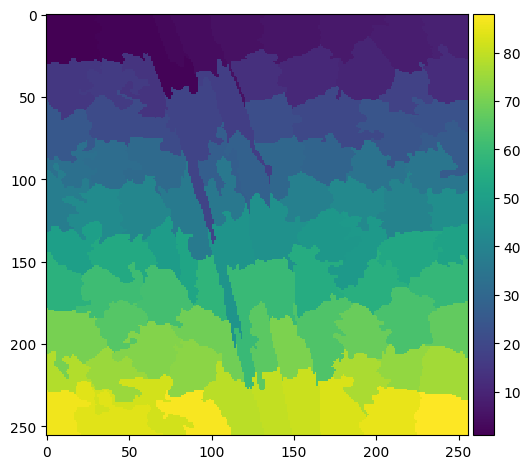

In [2]:
image = imread('/content/00001.png')
segments = slic(image, n_segments=100, compactness=10,sigma =1)

# Display the segmented image
imshow(segments)


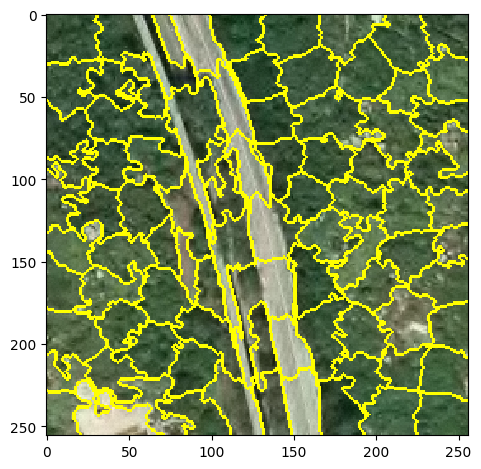

In [3]:
reconstructed = mark_boundaries(image, segments)

# Display the reconstructed image
imshow(reconstructed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


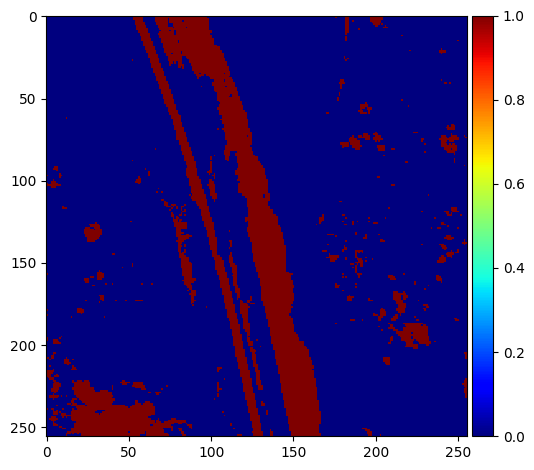

In [5]:
import numpy as np
from skimage.io import imread
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report


import numpy as np
from skimage.io import imread
from sklearn.cluster import KMeans

def classify_pixels(image, n_clusters, threshold):
    # Flatten the image pixels for clustering
    data = image.reshape((-1, image.shape[-1]))

    # Perform fuzzy c-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    membership_values = kmeans.predict(data)

    # Classify pixels based on membership values
    classified_image = np.zeros(image.shape[:2], dtype=int)

    for i in range(data.shape[0]):
        max_membership = np.max(membership_values[i])
        cluster_idx = np.argmax(membership_values[i])

        if max_membership > threshold:
            classified_image[i // image.shape[1], i % image.shape[1]] = cluster_idx + 1
        else:
            classified_image[i // image.shape[1], i % image.shape[1]] = 0

    return classified_image

# Example usage
image1 = imread('/content/00001.png')
image2 = imread('/content/0001.png')
n_clusters = 2
threshold = 0.5

classified_image = classify_pixels(image1, n_clusters, threshold)

# Display the classified image
imshow(classified_image, cmap='jet')


In [6]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=af9f41d3e66223a3a3184f809331e9c986a2d54641f4c2d47e759d09105eb8dd
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [7]:
import numpy as np
from skimage import io, color
import skfuzzy as fuzz

In [9]:
def fuzzy_cmeans_change_detection(image1, image2, num_clusters, fuzziness):
    # Load and convert images to grayscale
    img1 = color.rgb2gray(io.imread(image1))
    img2 = color.rgb2gray(io.imread(image2))

    # Flatten images into 1D arrays
    img1_flat = img1.reshape(-1)
    img2_flat = img2.reshape(-1)

    # Concatenate the two image arrays
    data = np.column_stack((img1_flat, img2_flat))

    # Perform Fuzzy C-Means clustering
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data.T, num_clusters, fuzziness, error=0.005, maxiter=1000)

    # Calculate the change map
    change_map = np.argmax(u, axis=0).reshape(img1.shape)

    return change_map

# Example usage
image1_path = '/content/00001.png'  # Replace with the path to your first image
image2_path = '/content/0001.png'  # Replace with the path to your second image
num_clusters = 2            # Number of clusters (change and non-change)
fuzziness = 2               # Fuzziness parameter

change_map = fuzzy_cmeans_change_detection(image1_path, image2_path, num_clusters, fuzziness)

# Save the change map as an image
io.imsave('change_map.jpg', change_map)


<ipython-input-9-084c1db6c65e>:31: UserWarning: change_map.jpg is a low contrast image
  io.imsave('change_map.jpg', change_map)


TypeError: ignored